<a href="https://colab.research.google.com/github/ABHIRAM199/MY-ML-Projects/blob/main/Breast_cancer_detection_using_Deep_Learning_ABHIRAMTV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np  # Import numpy library for numerical operations
import pandas as pd  # Import pandas library for data manipulation and analysis
import seaborn as sns  # Import seaborn library for data visualization
import matplotlib.pyplot as plt #plotting graphs

In [3]:
import os

#Specify the path to your dataset in Google Drive
# Replace 'MyDrive/dataset_folder' with your actual Google Drive folder path
dataset_path = '/content/drive/MyDrive/breast cancer/breast cancer detection'

# Step 3: Iterate through files in the specified Google Drive path
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/breast cancer/breast cancer detection/benign/benign (100)_mask.png
/content/drive/MyDrive/breast cancer/breast cancer detection/benign/benign (108)_mask.png
/content/drive/MyDrive/breast cancer/breast cancer detection/benign/benign (113)_mask.png
/content/drive/MyDrive/breast cancer/breast cancer detection/benign/benign (100)_mask_1.png
/content/drive/MyDrive/breast cancer/breast cancer detection/benign/benign (107)_mask.png
/content/drive/MyDrive/breast cancer/breast cancer detection/benign/benign (110).png
/content/drive/MyDrive/breast cancer/breast cancer detection/benign/benign (118)_mask.png
/content/drive/MyDrive/breast cancer/breast cancer detection/benign/benign (119)_mask.png
/content/drive/MyDrive/breast cancer/breast cancer detection/benign/benign (114)_mask.png
/content/drive/MyDrive/breast cancer/breast cancer detection/benign/benign (113).png
/content/drive/MyDrive/breast cancer/breast cancer detection/benign/benign (116).png
/content/drive/MyDrive/

In [4]:
base_path = '/content/drive/MyDrive/breast cancer/breast cancer detection'
categories = ['benign', 'malignant', 'normal']

data = []

for category in categories:
    category_path = os.path.join(base_path, category)

    for filename in os.listdir(category_path):
        if filename.endswith('.png') and '_mask' not in filename:  # Exclude mask images
            file_path = os.path.join(category_path, filename)
            data.append({'image_path': file_path, 'label': category})

df = pd.DataFrame(data)

In [5]:
df.head()

,image_path,label
0,/content/drive/MyDrive/breast cancer/breast ca...,benign
1,/content/drive/MyDrive/breast cancer/breast ca...,benign
2,/content/drive/MyDrive/breast cancer/breast ca...,benign
3,/content/drive/MyDrive/breast cancer/breast ca...,benign
4,/content/drive/MyDrive/breast cancer/breast ca...,benign


In [6]:
df.tail()

,image_path,label
781,/content/drive/MyDrive/breast cancer/breast ca...,normal
782,/content/drive/MyDrive/breast cancer/breast ca...,normal
783,/content/drive/MyDrive/breast cancer/breast ca...,normal
784,/content/drive/MyDrive/breast cancer/breast ca...,normal
785,/content/drive/MyDrive/breast cancer/breast ca...,normal


In [7]:
df.shape

(786, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  786 non-null    object
 1   label       786 non-null    object
dtypes: object(2)
memory usage: 12.4+ KB


In [9]:
df.columns

Index(['image_path', 'label'], dtype='object')

<ipython-input-10-bce79a466800>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='label', palette='viridis')


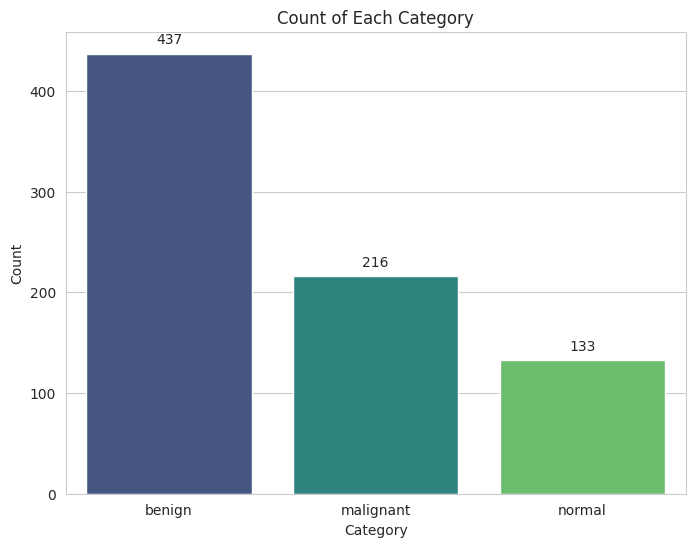

In [10]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

ax = sns.countplot(data=df, x='label', palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.title("Count of Each Category")
plt.xlabel("Category")
plt.ylabel("Count")

plt.show()

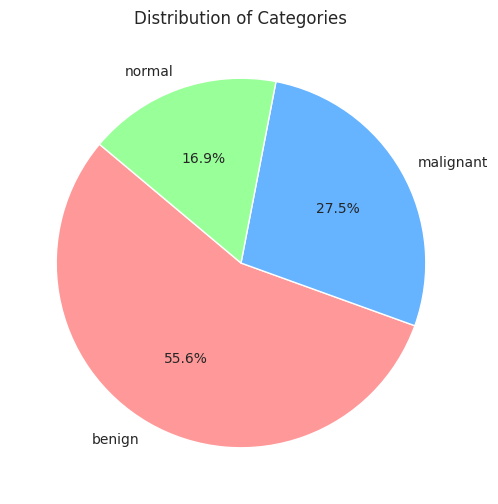

In [11]:
label_counts = df['label'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])

plt.title("Distribution of Categories")

plt.show()

In [12]:
import cv2

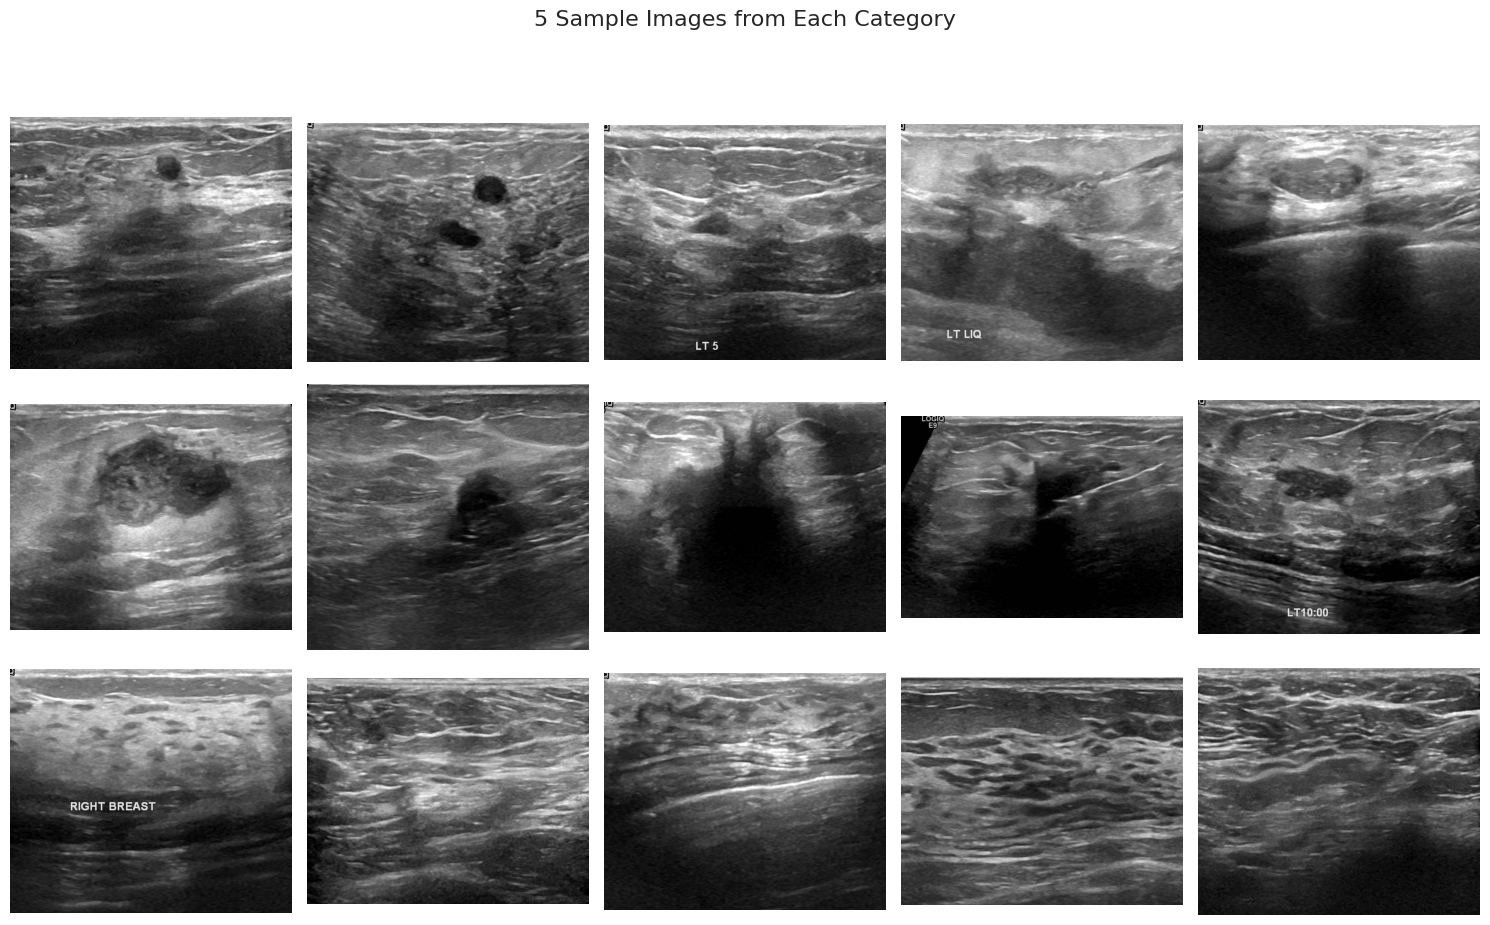

In [13]:
num_images = 5

fig, axes = plt.subplots(len(categories), num_images, figsize=(15, 10))
fig.suptitle("5 Sample Images from Each Category", fontsize=16)

for i, category in enumerate(categories):

    sample_images = df[df['label'] == category].sample(num_images, random_state=42)

    for j, image_path in enumerate(sample_images['image_path']):

        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        if j == 0:
            axes[i, j].set_ylabel(category, fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['label'])

In [15]:
df = df[['image_path', 'category_encoded']]

In [16]:
from imblearn.over_sampling import RandomOverSampler

In [17]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['category_encoded'])

In [18]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['category_encoded'] = y_resampled

In [19]:
print("\nClass distribution after oversampling:")
print(df_resampled['category_encoded'].value_counts())


Class distribution after oversampling:
category_encoded
0    437
1    437
2    437
Name: count, dtype: int64


In [20]:
df_resampled

,image_path,category_encoded
0,/content/drive/MyDrive/breast cancer/breast ca...,0
1,/content/drive/MyDrive/breast cancer/breast ca...,0
2,/content/drive/MyDrive/breast cancer/breast ca...,0
3,/content/drive/MyDrive/breast cancer/breast ca...,0
4,/content/drive/MyDrive/breast cancer/breast ca...,0
...,...,...
1306,/content/drive/MyDrive/breast cancer/breast ca...,2
1307,/content/drive/MyDrive/breast cancer/breast ca...,2
1308,/content/drive/MyDrive/breast cancer/breast ca...,2
1309,/content/drive/MyDrive/breast cancer/breast ca...,2


In [21]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [22]:
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

In [23]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category_encoded']
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded']
)

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

Found 1048 validated image filenames belonging to 3 classes.
Found 131 validated image filenames belonging to 3 classes.
Found 132 validated image filenames belonging to 3 classes.


In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [26]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using GPU


In [27]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [28]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention
from tensorflow.keras.optimizers import Adam

def create_vgg16_modified_model(input_shape):
    inputs = Input(shape=input_shape)
    base_model = VGG16(weights='imagenet', input_tensor=inputs, include_top=False)

    for layer in base_model.layers[:-4]:
        layer.trainable = False

    x = base_model.output

    attention_output = MultiHeadAttention(num_heads=8, key_dim=x.shape[-1])(x, x)
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)

    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.3)(x)

    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)

    outputs = Dense(3, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_modified_model = create_vgg16_modified_model(input_shape)

cnn_modified_model.compile(optimizer=Adam(learning_rate=0.0001),
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [29]:
history = cnn_modified_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=50,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 234s 3s/step - accuracy: 0.5699 - loss: 0.9925 - val_accuracy: 0.3282 - val_loss: 1.2210
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 227ms/step - accuracy: 0.7979 - loss: 0.5292 - val_accuracy: 0.5191 - val_loss: 1.0696
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 228ms/step - accuracy: 0.8999 - loss: 0.2870 - val_accuracy: 0.7634 - val_loss: 0.5781
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 225ms/step - accuracy: 0.9039 - loss: 0.2962 - val_accuracy: 0.3588 - val_loss: 2.6727
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 223ms/step - accuracy: 0.9247 - loss: 0.2060 - val_accuracy: 0.7786 - val_loss: 0.5868
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 225ms/step - accuracy: 0.9461 - loss: 0.1584 - val_accuracy: 0.8779 - val_loss: 0.3600
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 225ms/step - accuracy: 0.9711 - loss: 0.0901 - val_accuracy: 0.5878 - val_loss: 2.2387
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 226ms/step - accuracy: 0.9638 - loss: 0.1243 - val_accura

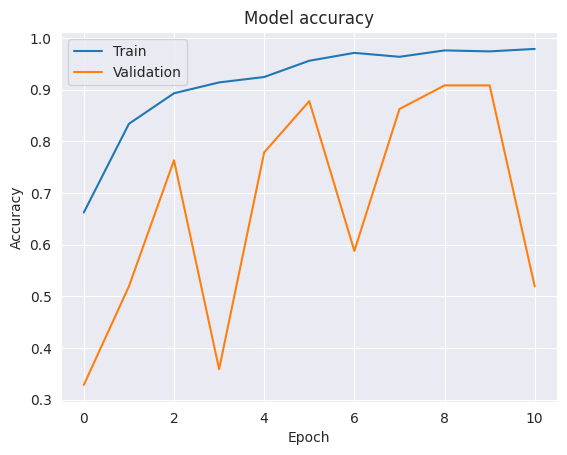

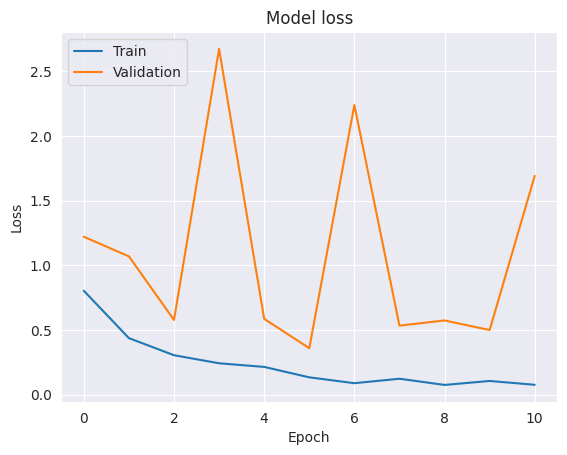

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [31]:
test_labels = test_gen_new.classes
predictions = cnn_modified_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step


In [32]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.77      0.93      0.85        44
           1       0.97      0.77      0.86        44
           2       0.95      0.95      0.95        44

    accuracy                           0.89       132
   macro avg       0.90      0.89      0.89       132
weighted avg       0.90      0.89      0.89       132



In [33]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

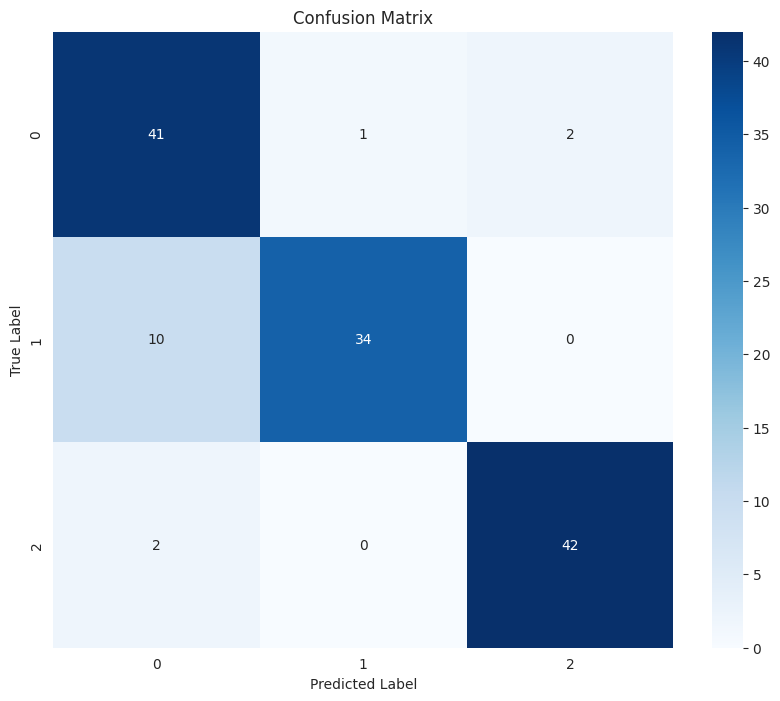

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [35]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention
from tensorflow.keras.optimizers import Adam

def create_xception_modified_model(input_shape):
    inputs = Input(shape=input_shape)
    base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)

    for layer in base_model.layers[:-4]:
        layer.trainable = False

    x = base_model.output

    attention_output = MultiHeadAttention(num_heads=8, key_dim=x.shape[-1])(x, x)
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)

    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.3)(x)

    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)

    outputs = Dense(3, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_modified_model_xception = create_xception_modified_model(input_shape)

cnn_modified_model_xception.compile(optimizer=Adam(learning_rate=0.0001),
                                    loss='sparse_categorical_crossentropy',
                                    metrics=['accuracy'])


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [36]:
history = cnn_modified_model_xception.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=50,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 65s 618ms/step - accuracy: 0.6075 - loss: 0.9666 - val_accuracy: 0.7786 - val_loss: 0.6997
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 44s 296ms/step - accuracy: 0.8143 - loss: 0.5052 - val_accuracy: 0.8244 - val_loss: 0.4714
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 43s 324ms/step - accuracy: 0.9068 - loss: 0.2852 - val_accuracy: 0.8702 - val_loss: 0.3532
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 298ms/step - accuracy: 0.9484 - loss: 0.1636 - val_accuracy: 0.8779 - val_loss: 0.3883
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 42s 307ms/step - accuracy: 0.9729 - loss: 0.0924 - val_accuracy: 0.9160 - val_loss: 0.2974
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 310ms/step - accuracy: 0.9736 - loss: 0.0806 - val_accuracy: 0.8321 - val_loss: 0.5705
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 300ms/step - accuracy: 0.9693 - loss: 0.0998 - val_accuracy: 0.9008 - val_loss: 0.4138
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 298ms/step - accuracy: 0.9701 - loss: 0.0819 - val_accu

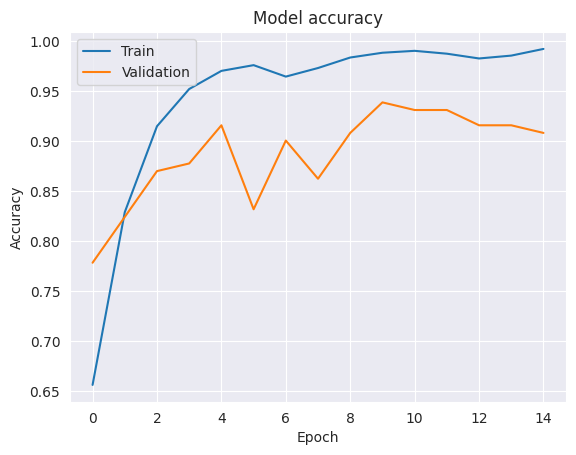

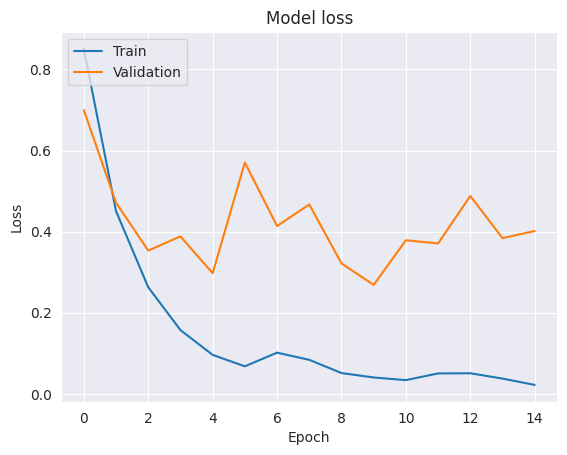

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [38]:
test_labels = test_gen_new.classes
predictions = cnn_modified_model_xception.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 743ms/step


In [39]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.95      0.82      0.88        44
           1       0.85      0.89      0.87        44
           2       0.88      0.95      0.91        44

    accuracy                           0.89       132
   macro avg       0.89      0.89      0.89       132
weighted avg       0.89      0.89      0.89       132



In [40]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

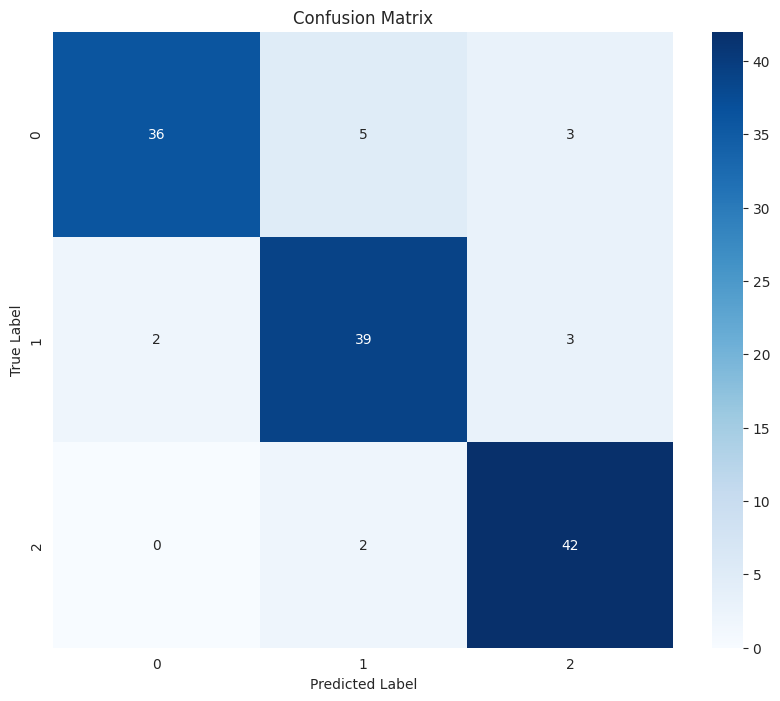

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

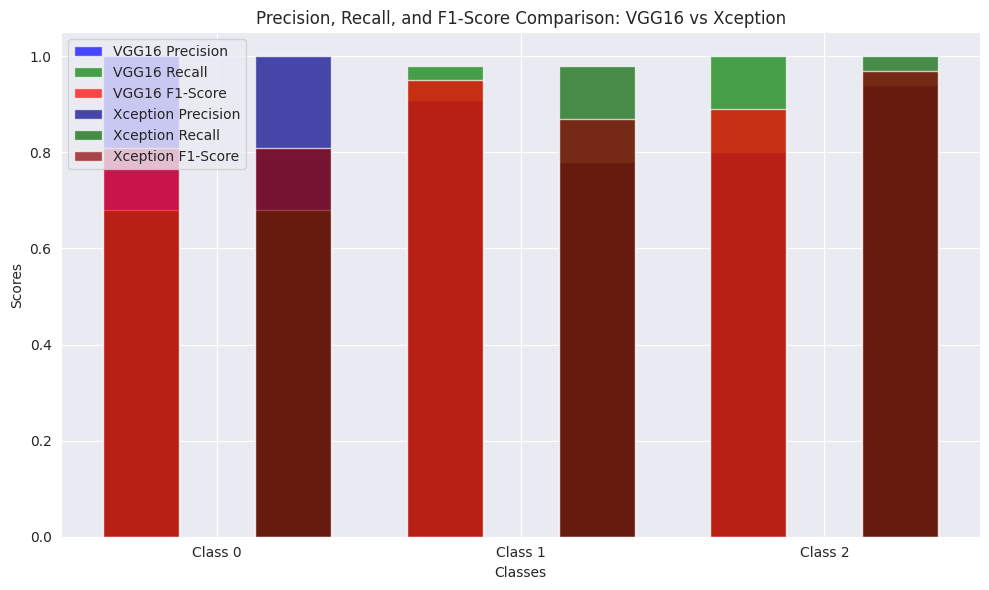

In [42]:
classes = ['Class 0', 'Class 1', 'Class 2']
vgg16_precision = [1.00, 0.91, 0.80]
vgg16_recall = [0.68, 0.98, 1.00]
vgg16_f1_score = [0.81, 0.95, 0.89]

xception_precision = [1.00, 0.78, 0.94]
xception_recall = [0.68, 0.98, 1.00]
xception_f1_score = [0.81, 0.87, 0.97]

x = np.arange(len(classes))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - width, vgg16_precision, width, label='VGG16 Precision', color='blue', alpha=0.7)
ax.bar(x - width, vgg16_recall, width, label='VGG16 Recall', color='green', alpha=0.7)
ax.bar(x - width, vgg16_f1_score, width, label='VGG16 F1-Score', color='red', alpha=0.7)

ax.bar(x + width, xception_precision, width, label='Xception Precision', color='darkblue', alpha=0.7)
ax.bar(x + width, xception_recall, width, label='Xception Recall', color='darkgreen', alpha=0.7)
ax.bar(x + width, xception_f1_score, width, label='Xception F1-Score', color='darkred', alpha=0.7)

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score Comparison: VGG16 vs Xception')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

plt.tight_layout()
plt.show()